In [1]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [22]:
# 앞 장에서 구현한 KNN 회귀 모델을 구현한다.
kn = KNeighborsRegressor()
train_input, test_input, train_target, test_target = [x.reshape(-1, 1) for x in train_test_split(perch_length, perch_weight, random_state=42)]
kn.fit(train_input, train_target)
print(kn.score(train_input, train_target), kn.score(test_input, test_target))
# 길이가 50인 농어를 피팅한다. 실제 무게는 1500인데 실제와 오차가 큰 예측값이 출력된다.
kn.predict([[50]])

0.9804899950518966 0.9746459963987609


array([[1033.33333333]])

In [ ]:
import matplotlib.pyplot as plt
distance, indexes = kn.kneighbors([[50]])
plt.scatter(train_input, train_target, label='train_data')
plt.scatter(train_input[indexes], train_target[indexes], marker='D', label='neighbors')
plt.scatter(50, kn.predict([[50]]), marker='^', label='target_50')
plt.scatter(100, kn.predict([[100]]), marker='*' ,label='target_100')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

# 그림에서 알 수 있듯이 45cm 근방의 평균 길이로 예측한다. knn의 한계.
# 만약 100cm 를 예측해도 45cm 근방으로 예측된다.
# 따라서 추가적인 데이터셋을 입력하거나 다른 예측 알고리즘을 찾아야 한다.

In [33]:
# 선형회귀 알고리즘을 적용해보자
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.predict([[50]]))
# coef는 기울기, intercept는 절편을 의미한다
print(lr.coef_, lr.intercept_)

[[1241.83860323]]
[[39.01714496]] [-709.01864495]


array([39.01714496])

In [37]:
15 * lr.coef_ + lr.intercept_, 50 * lr.coef_ + lr.intercept_

(array([[-123.7614705]]), array([[1241.83860323]]))

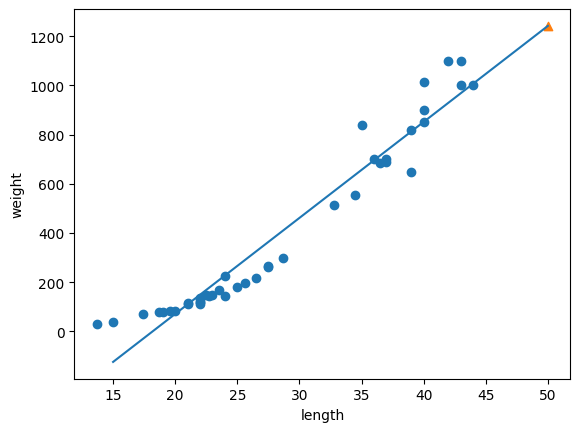

In [44]:
plt.scatter(train_input, train_target)
plt.plot([15, 50], [15 * lr.coef_[0] + lr.intercept_[0], 50 * lr.coef_[0] + lr.intercept_[0]])
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [45]:
# 점수를 확인하니 전체적으로 과소적합된 형태.
# 50cm에 대한 예측도 부정확.
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


In [48]:
# 직선으로만 회귀하지 않고 최적의 곡선을 찾으면 어떨까?
# 다항회귀를 통해 자연스러운 곡선형태로 구해보자
# x는 길이 이므로, 길이를 제곱한 항이 훈련세트에 추가되어야 한다.

train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))
print(train_poly.shape)
print(test_poly.shape)

(42, 2)
(14, 2)


In [49]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.predict([[50 ** 2, 50]]))

[[1573.98423528]]


In [50]:
print(lr.coef_, lr.intercept_)

[[  1.01433211 -21.55792498]] [116.05021078]


In [53]:
# 그래프를 그리기 위해 기울기와 절편을 미리 추출한다.
a, b = lr.coef_[0]
c = lr.intercept_

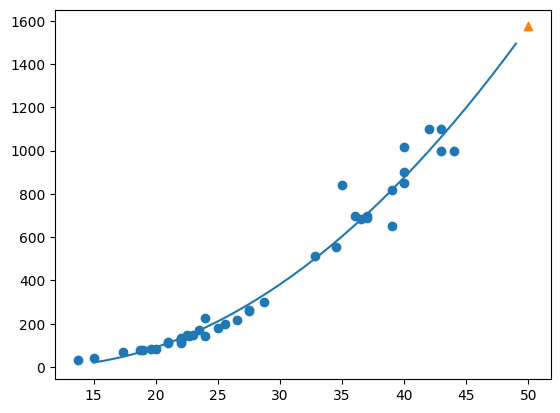

In [54]:
point = np.arange(15, 50)
plt.scatter(train_input, train_target)
# 아래에서 point는 배열이다. 짧은 선을 여러개 이어그려서 곡선처럼 그릴 수 있게 표현하였다.
plt.plot(point, a * point ** 2 + b * point + c)
plt.scatter(50, 1574, marker = '^')
plt.show()

In [57]:
#모델을 평가하기 위해 점수를 출력해본다.
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))
# 과소적합이 조금 남아 있는 것을 확인할 수 있다. 조금 더 복잡한 모델이 필요할까??

0.9706807451768623
0.9775935108325122
